In [1]:
from defectlib import load_tensors
from defectlib import load_tensors_all
from defectlib import combine_shuffle_tensors, display_tensor, keras_transform, make_model, train_model
from defectlib import Config
from matplotlib import image
from IPython.display import Image
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
import defectlib
import cv2
import os
import numpy as np
%matplotlib inline

Using TensorFlow backend.


In [2]:
from defectlib import maybe_pickle

In [3]:
tensor_dict = load_tensors_all('./defect_tensors/Conn2/')

In [4]:
tensors, labels, sn = combine_shuffle_tensors(tensor_dict)

the final tensor should be 1291
number of class 0: 1115
number of class 1: 176


In [20]:
set([item.split('/')[0] for item in sn[labels == 2]])

set()

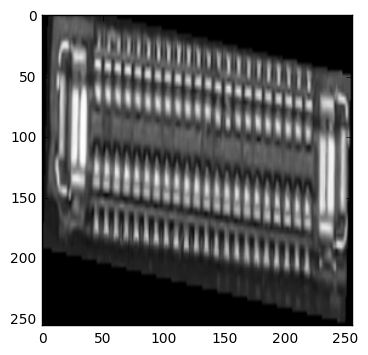

In [5]:
plt.imshow(tensors[0], cmap='gray')

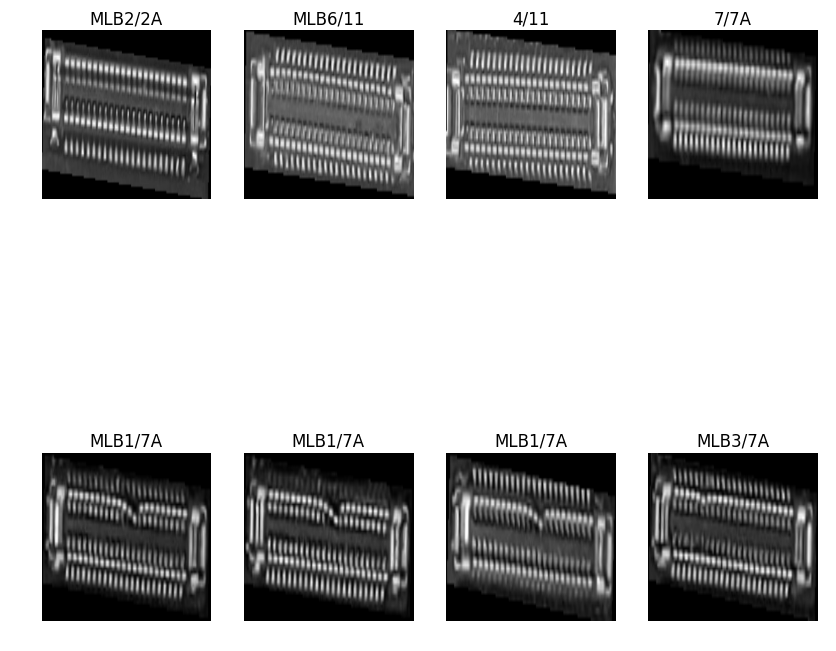

In [6]:
display_tensor(tensors, labels, sn)

In [7]:
from defectlib import KFold_modeling

In [8]:
info_string, models = KFold_modeling(tensors, labels, nb_classes=2, nb_epoch=10)

0it [00:00, ?it/s]

Train on 860 samples, validate on 431 samples
Epoch 1/10
860/860 [==============================] - 143s - loss: 0.4848 - acc: 0.8326 - val_loss: 0.4376 - val_acc: 0.8654
Epoch 2/10
860/860 [==============================] - 136s - loss: 0.4006 - acc: 0.8628 - val_loss: 0.5106 - val_acc: 0.8654
Epoch 3/10
860/860 [==============================] - 137s - loss: 0.3855 - acc: 0.8628 - val_loss: 0.3600 - val_acc: 0.8654
Epoch 4/10
860/860 [==============================] - 139s - loss: 0.3410 - acc: 0.8628 - val_loss: 0.3485 - val_acc: 0.8654
Epoch 5/10
860/860 [==============================] - 137s - loss: 0.3267 - acc: 0.8628 - val_loss: 0.4312 - val_acc: 0.8654
Epoch 6/10
860/860 [==============================] - 137s - loss: 0.3138 - acc: 0.8628 - val_loss: 0.3859 - val_acc: 0.8654
Epoch 7/10
860/860 [==============================] - 133s - loss: 0.2922 - acc: 0.8628 - val_loss: 0.3208 - val_acc: 0.8654
Epoch 8/10
860/860 [==============================] - 137s - loss: 0.2634 - acc

1it [23:31, 1411.33s/it]

('Sore log_loss: ', 0.25281294488829187)
Train on 861 samples, validate on 430 samples
Epoch 1/10
861/861 [==============================] - 153s - loss: 0.4575 - acc: 0.8606 - val_loss: 0.4016 - val_acc: 0.8488
Epoch 2/10
861/861 [==============================] - 141s - loss: 0.3755 - acc: 0.8711 - val_loss: 0.3677 - val_acc: 0.8488
Epoch 3/10
861/861 [==============================] - 154s - loss: 0.3324 - acc: 0.8711 - val_loss: 0.4427 - val_acc: 0.8488
Epoch 4/10
861/861 [==============================] - 145s - loss: 0.2893 - acc: 0.8711 - val_loss: 0.3356 - val_acc: 0.8488
Epoch 5/10
861/861 [==============================] - 142s - loss: 0.2617 - acc: 0.8711 - val_loss: 0.3590 - val_acc: 0.8488
Epoch 6/10
861/861 [==============================] - 139s - loss: 0.2439 - acc: 0.8780 - val_loss: 0.3452 - val_acc: 0.8488
Epoch 7/10
861/861 [==============================] - 138s - loss: 0.2124 - acc: 0.8990 - val_loss: 0.2641 - val_acc: 0.8721
Epoch 8/10
861/861 [==================

2it [48:03, 1429.55s/it]

('Sore log_loss: ', 0.16770649598391671)
Train on 861 samples, validate on 430 samples
Epoch 1/10
861/861 [==============================] - 146s - loss: 0.4931 - acc: 0.8409 - val_loss: 0.3989 - val_acc: 0.8767
Epoch 2/10
861/861 [==============================] - 136s - loss: 0.4198 - acc: 0.8571 - val_loss: 0.5103 - val_acc: 0.8767
Epoch 3/10
861/861 [==============================] - 135s - loss: 0.4099 - acc: 0.8571 - val_loss: 0.3489 - val_acc: 0.8767
Epoch 4/10
861/861 [==============================] - 134s - loss: 0.3854 - acc: 0.8571 - val_loss: 0.3123 - val_acc: 0.8767
Epoch 5/10
861/861 [==============================] - 134s - loss: 0.3536 - acc: 0.8571 - val_loss: 0.3278 - val_acc: 0.8767
Epoch 6/10
861/861 [==============================] - 135s - loss: 0.3271 - acc: 0.8571 - val_loss: 0.2814 - val_acc: 0.8767
Epoch 7/10
861/861 [==============================] - 133s - loss: 0.2980 - acc: 0.8571 - val_loss: 0.2837 - val_acc: 0.8767
Epoch 8/10
861/861 [==================

3it [1:08:09, 1362.57s/it]

('Sore log_loss: ', 0.23088036021727021)


In [10]:
models[0].predict(keras_transform(tensors, labels)[0])

array([[  9.99020338e-01,   9.79659613e-04],
       [  7.94296205e-01,   2.05703884e-01],
       [  9.97749269e-01,   2.25067115e-03],
       ..., 
       [  9.98040378e-01,   1.95967779e-03],
       [  9.99212384e-01,   7.87612633e-04],
       [  9.99429405e-01,   5.70526638e-04]], dtype=float32)

In [11]:
model = models[0]

In [12]:
predict_test = model.predict_classes(keras_transform(tensors, labels)[0])

1291/1291 [==============================] - 22s    


In [13]:
from sklearn.metrics import classification_report

In [17]:
print classification_report(labels, predict_test)

             precision    recall  f1-score   support

          0       0.88      1.00      0.94      1115
          1       0.93      0.15      0.25       176

avg / total       0.89      0.88      0.84      1291

